<a href="https://colab.research.google.com/github/Jaahnavi5666/Heart-Disease-Prediction-using-Machine-learning/blob/main/Heart_Disease_prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing important Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt



# Loading and exploring the given data set

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Asgn1_20EE10033/framingham.csv')  # Replace with your dataset filename
data = data.dropna();
# Explore the data
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # Get information about the dataset
print(data.describe())  # Summary statistics


   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

# Feature selection and scaling using PCA

In [ ]:
# Step 2: Normalize the original data
scaler = StandardScaler()
X = data.drop('TenYearCHD', axis = 1);
y = data['TenYearCHD'];
X_normalized = scaler.fit_transform(X)  # X is your original dataset

# Step 3: Calculate the covariance matrix
cov_matrix = np.cov(X_normalized, rowvar=False)

# Step 4: Calculate Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# Sort eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]
# Calculate explained variance
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
# Set a threshold for the desired explained variance (e.g., 95%)
threshold = 0.95
# Find the smallest k such that cumulative explained variance exceeds the threshold
k = np.argmax(cumulative_variance >= threshold) + 1
print(f'Number of Principal Components (k) to Retain: {k}')


Number of Principal Components (k) to Retain: 13


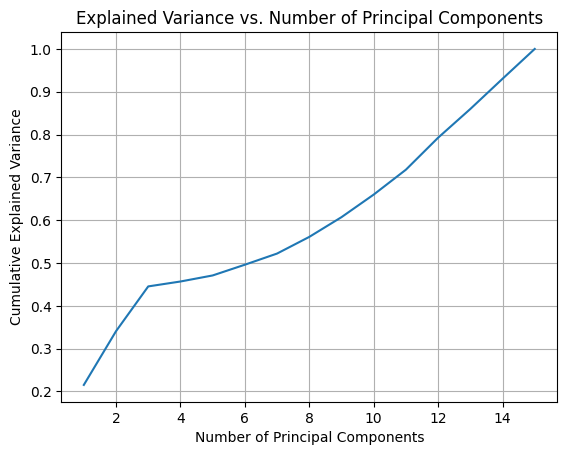

In [ ]:
# Step 5: Calculate Principal Components
k = 13  # Number of principal components to retain
top_k_eigenvectors = eigenvectors[:, :k]

# Step 6: Plot explained variance
explained_variance = eigenvalues / np.sum(eigenvalues)
plt.plot(np.arange(1, len(explained_variance) + 1), np.cumsum(explained_variance))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [ ]:
alt_data = data.drop('TenYearCHD',axis = 1)
# Perform PCA for feature selection and scaling
pca = PCA(n_components=13)  # You can adjust the number of components
X_pca = pca.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Test-Train Split

In [ ]:
test_size = 0.3
random_state = 42

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

# Resample

0    3101
1     557
Name: TenYearCHD, dtype: int64


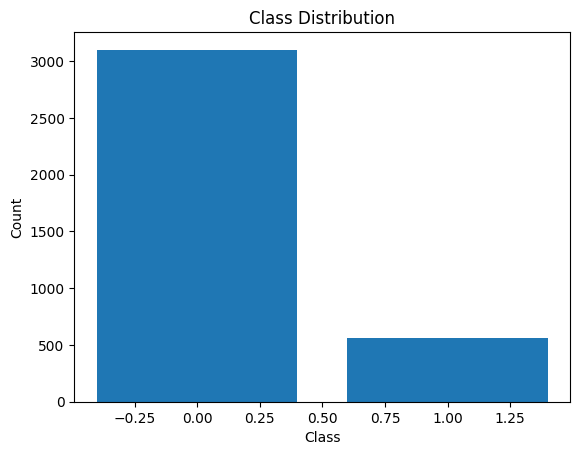

In [ ]:
# check the balance of classes
# Assuming you have a binary classification problem with 'y' as your target variable
class_distribution = y.value_counts()
print(class_distribution)
# Visualize class distribution
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Fit and apply SMOTE to your training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
class_distribution_resampled = y_train_resampled.value_counts()
print(class_distribution_resampled)

0    2179
1    2179
Name: TenYearCHD, dtype: int64


# Model Pipelines

In [ ]:
# Create pipelines for different models
lr_pipeline = Pipeline([
    ('classifier', LogisticRegression())
])

svm_pipeline = Pipeline([
    ('classifier', SVC())
])

dt_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

knn_pipeline = Pipeline([
    ('classifier', KNeighborsClassifier())
])


# Modelling and Evaluation

In [ ]:
# Train and evaluate Logistic Regression
lr_pipeline.fit(X_train_resampled, y_train_resampled)
lr_predictions = lr_pipeline.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 0.6830601092896175
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       922
           1       0.29      0.68      0.41       176

    accuracy                           0.68      1098
   macro avg       0.60      0.68      0.59      1098
weighted avg       0.82      0.68      0.72      1098



In [ ]:
# Train and evaluate Support Vector Machine
svm_pipeline.fit(X_train_resampled, y_train_resampled)
svm_predictions = svm_pipeline.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Logistic Regression Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_predictions))


Logistic Regression Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       922
           1       0.27      0.42      0.33       176

    accuracy                           0.72      1098
   macro avg       0.57      0.60      0.58      1098
weighted avg       0.78      0.72      0.75      1098



In [ ]:
# Train and evaluate Decision Tree Classifier
dt_pipeline.fit(X_train_resampled, y_train_resampled)
dt_predictions = dt_pipeline.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Logistic Regression Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_predictions))

Logistic Regression Accuracy: 0.6985428051001822
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       922
           1       0.23      0.39      0.29       176

    accuracy                           0.70      1098
   macro avg       0.55      0.57      0.55      1098
weighted avg       0.76      0.70      0.73      1098



In [ ]:
# Train and evaluate K near neighbour Classifier
knn_pipeline.fit(X_train_resampled, y_train_resampled)
knn_predictions = knn_pipeline.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("Logistic Regression Accuracy:", knn_accuracy)
print(classification_report(y_test, knn_predictions))

Logistic Regression Accuracy: 0.6621129326047359
              precision    recall  f1-score   support

           0       0.89      0.69      0.77       922
           1       0.25      0.53      0.34       176

    accuracy                           0.66      1098
   macro avg       0.57      0.61      0.55      1098
weighted avg       0.78      0.66      0.70      1098

